In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from glob import glob
import math

import numpy as np
import pandas as pd

In [4]:
root_dir = "../resources/nfl-big-data-bowl-2024/"

In [5]:
games_df = pd.read_csv(root_dir + "games.csv")
players_df = pd.read_csv(root_dir + "players.csv")
plays_df = pd.read_csv(root_dir + "plays.csv")
tackles_df = pd.read_csv(root_dir + "tackles.csv")

In [6]:
tracking_files = []
# tracking data
for i, tracking_filename in enumerate(glob(root_dir + "tracking*.csv")):
  file = pd.read_csv(tracking_filename)
  tracking_files.append(file)
tracking_df = pd.concat(tracking_files, ignore_index=True)

In [7]:
games_df.head(5)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23


In [8]:
players_df.head(5)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan


In [9]:
players_df["weight"].unique()

array([225, 328, 267, 217, 245, 315, 175, 300, 222, 220, 229, 215, 320,
       304, 265, 275, 185, 195, 254, 325, 285, 335, 330, 250, 210, 203,
       288, 257, 287, 295, 192, 270, 199, 235, 260, 207, 202, 310, 305,
       247, 214, 242, 233, 279, 248, 243, 352, 308, 321, 198, 200, 212,
       174, 317, 311, 238, 190, 221, 193, 340, 255, 211, 179, 327, 205,
       307, 281, 240, 263, 197, 230, 191, 309, 178, 269, 231, 280, 194,
       312, 183, 252, 196, 336, 301, 350, 322, 256, 290, 332, 232, 306,
       224, 302, 216, 316, 292, 313, 218, 338, 341, 182, 236, 318, 177,
       272, 227, 323, 298, 380, 234, 184, 209, 180, 208, 188, 299, 223,
       237, 228, 314, 244, 201, 246, 296, 303, 261, 291, 324, 347, 189,
       294, 213, 259, 181, 253, 289, 264, 266, 204, 284, 297, 226, 173,
       258, 345, 329, 251, 206, 277, 331, 344, 187, 219, 239, 262, 342,
       249, 170, 176, 326, 366, 334, 319, 241, 268, 172, 333, 186, 153,
       165, 273, 278, 346, 274, 293, 355, 282, 360, 379])

In [10]:
plays_df.head(5)

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022100908,3537,48723,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,...,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN
1,2022091103,3126,52457,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,...,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN
2,2022091111,1148,42547,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,...,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN
3,2022100212,2007,46461,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,...,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN
4,2022091900,1372,47857,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,...,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN


In [91]:
tackles_df[tackles_df["playId"] == 146].head(50)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
6136,2022102300,146,44999,1,0,0,0
7530,2022103003,146,53465,1,0,0,0
11016,2022090800,146,38577,0,1,0,0
11240,2022090800,146,43335,0,1,0,0


In [12]:
tracking_df.head(5)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022100600,90,33084.0,Matt Ryan,1,2022-10-06 20:17:04.799999,2.0,IND,left,90.42,23.74,0.11,0.04,0.03,271.98,257.76,NaN
1,2022100600,90,33084.0,Matt Ryan,2,2022-10-06 20:17:04.900000,2.0,IND,left,90.39,23.74,0.14,0.06,0.03,272.84,256.68,NaN
2,2022100600,90,33084.0,Matt Ryan,3,2022-10-06 20:17:05.000000,2.0,IND,left,90.36,23.73,0.17,0.09,0.03,272.84,254.91,NaN
3,2022100600,90,33084.0,Matt Ryan,4,2022-10-06 20:17:05.099999,2.0,IND,left,90.32,23.73,0.19,0.11,0.04,275.80,260.06,NaN
4,2022100600,90,33084.0,Matt Ryan,5,2022-10-06 20:17:05.200000,2.0,IND,left,90.28,23.72,0.20,0.13,0.04,275.80,257.79,NaN


In [42]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["event"].unique())

[nan 'pass_arrived' 'pass_outcome_caught' 'tackle' 'run' 'first_contact'
 'ball_snap' 'handoff' 'touchdown' 'out_of_bounds' 'man_in_motion'
 'fumble' 'play_action' 'pass_forward' 'lateral' 'line_set']


In [13]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["frameId"].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81]


In [14]:
print(tracking_df[(tracking_df.gameId == 2022090800)]["event"])

8223164             NaN
8223165    pass_arrived
8223166             NaN
8223167             NaN
8223168             NaN
               ...     
8302371          tackle
8302372             NaN
8302373             NaN
8302374             NaN
8302375             NaN
Name: event, Length: 79212, dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


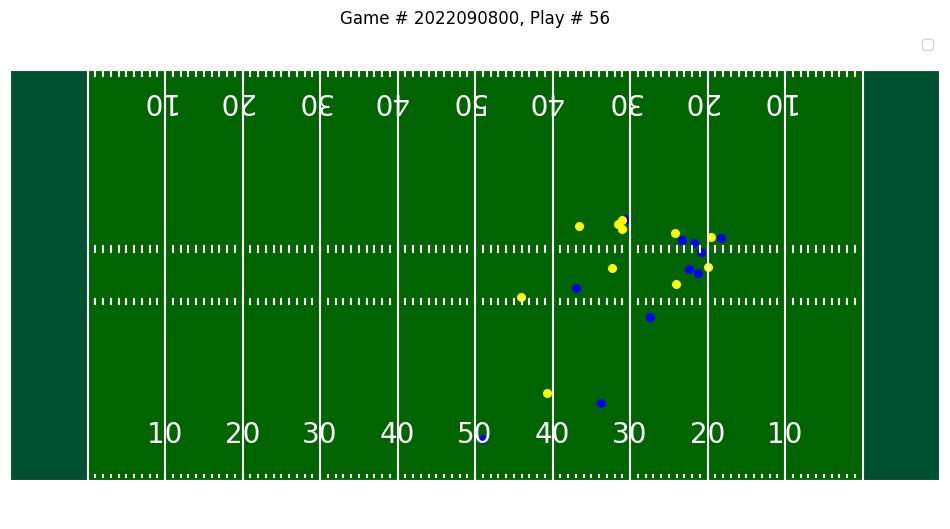

In [15]:
import matplotlib.pyplot as plt
from src.utils import create_football_field
%matplotlib inline
fig, ax =create_football_field()

tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'BUF'").plot(x='x', y='y', kind='scatter', ax=ax, color='blue', s=30, legend='Away')
tracking_df.query("gameId == 2022090800 and playId == 56 and frameId == 22 and club == 'LA'").plot(x='x', y='y', kind='scatter', ax=ax, color='yellow', s=30, legend='Home')
plt.title('Game # 2022090800, Play # 56')
plt.legend()
plt.show()

In [16]:
frame_max, frame_min = -1, 100000

tracking_df.drop(tracking_df[tracking_df["displayName"] == "football"].index, inplace=True)
frame_data = []
print(len(tracking_df.groupby(["gameId", "playId"])))
for i, (gameId, grouped_game) in enumerate(tracking_df.groupby(["gameId", "playId"])):
    current_frames = []
    if "tackle" not in grouped_game["event"].values:
         continue
    if len(grouped_game["frameId"].unique()) < 50:
           continue
    if len(grouped_game["frameId"].unique()) > 100:
          continue

    frame_max = max(frame_max, len(grouped_game["frameId"].unique()))
    frame_min = min(frame_min, len(grouped_game["frameId"].unique()))
    frames = grouped_game["frameId"].unique()
    for frame in frames:
        current_frames.append(
             grouped_game[grouped_game.frameId == frame]
             )
    
    frame_data.append(current_frames)
    if len(frame_data) > 2:
         break

12483


In [107]:
print(f"Batches: {len(frame_data)}")
print(f"Number of frames: {len(frame_data[0])}")
print(f"First frame number of nodes: {len(frames)}")
print(tracking_df.columns)

# (frames, num_nodes, num_features)
data = None

for lst_of_frames in frame_data:
    print(len(lst_of_frames))
for lst_of_frames in frame_data:
    seq_list = None
    for frames in lst_of_frames:
        frame = frames.sort_values(by="nflId")
        merged_games = pd.merge(games_df, frame, left_on='gameId', right_on='gameId')
        merged_plays = pd.merge(plays_df, frame, left_on=['gameId','playId'], right_on=['gameId','playId'])
        merged_tackles = pd.merge(
            tackles_df, 
            frame, 
            left_on=['gameId','playId'], 
            right_on=['gameId','playId'],
            suffixes=["_tackler", None]
        )
        player_attributes = players_df.set_index("nflId")
        x_vals = frame[["x"]].values / 120
        y_vals = frame[["y"]].values / 53.3
        s_vals = (frame[["s"]] - lst_of_frames[0][["s"]].mean())/lst_of_frames[0][["s"]].std()
        a_vals = (frame[["a"]] - lst_of_frames[0][["a"]].mean())/lst_of_frames[0][["a"]].std()
        dis_vals = frame[["dis"]].values
        o_vals = frame[["o"]].values / 360
        dir_vals = frame[["dir"]].values / 360
        weight_vals = ((
            player_attributes.loc[frame["nflId"]]["weight"].values - player_attributes["weight"].values.min()) / 
        (player_attributes["weight"].values.max() -player_attributes["weight"].values.min()))[..., np.newaxis]
        is_home = np.where(merged_games["homeTeamAbbr"].values  == merged_games["club"].values, 1, 0)[..., np.newaxis]
        is_in_possesion = np.where(merged_plays["possessionTeam"].values  == merged_plays["club"].values, 1, 0)[..., np.newaxis]
        is_ball_carrier = np.where(merged_plays["nflId"].values  == merged_plays["ballCarrierId"].values, 1, 0)[..., np.newaxis]
        is_involved = np.isin(frame[["nflId"]].values, merged_tackles["nflId_tackler"].unique())
        is_tackle_play = frame[["event"]].isin(["tackle", "fumble", "first_contact"])
        current = np.concatenate(
            [x_vals, y_vals, s_vals, a_vals, dis_vals, o_vals, dir_vals, weight_vals, 
             is_home, is_in_possesion, is_ball_carrier, is_involved, is_tackle_play], 
            axis=1
            )[np.newaxis, ...]
        # Generate sequences of frames (len_input_seq)
        seq_list = np.concatenate((seq_list, current), axis=0) if seq_list is not None else current
    # Batch sequences of frames (batch_size)
    data = np.concatenate((data, seq_list), axis=0) if data is not None else seq_list[np.newaxis, ...]
    break

Batches: 3
Number of frames: 56
First frame number of nodes: 22
Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event'],
      dtype='object')
56
51
53


In [102]:
print(merged_tackles.nflId_tackler.values)

[38577 38577 38577 38577 38577 38577 38577 38577 38577 38577 38577 38577
 38577 38577 38577 38577 38577 38577 38577 38577 38577 38577 43335 43335
 43335 43335 43335 43335 43335 43335 43335 43335 43335 43335 43335 43335
 43335 43335 43335 43335 43335 43335 43335 43335]


In [105]:
# (batch_size, frame, num_nodes, num_features)
print(data.shape)

(1, 56, 22, 13)


In [106]:
print(data[0][0][0])

[ 0.49883333  0.5217636  -0.70152939 -0.63164529  0.          0.76458333
  0.60644444  0.75770925  0.          1.          0.          0.
  0.        ]


In [16]:
import nfl_data_py as nfl
nfl.see_pbp_cols()

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [ ]:
def influence(player1: np.ndarray, player2: np.ndarray):
    """
    Compute the influence from one player1 to player2.
    The influence is computed by the l2 norm of
      position, velocity and acceleration
    """
    NORM = math.sqrt((player1[0]-player2[0])**2+ (player1[1]-player2[1])**2)
    V_NORM = math.sqrt((player1[3]-player2[3])**2)
    A_NORM = math.sqrt((player1[4]-player2[4])**2)
    if NORM ==0:
        return 0
    return (V_NORM + A_NORM)/(NORM)
    

In [39]:
adj = []
cmap = []
for elements in data[0][0]:
    current_element = []
    for other_elements in data[0][0]:
        is_not_same_team = elements[-2] != other_elements[-2]
        current_element.append(is_not_same_team)
    if elements[-2]:
        cmap.append('b')
    else:
        cmap.append('g')
    adj.append(current_element)

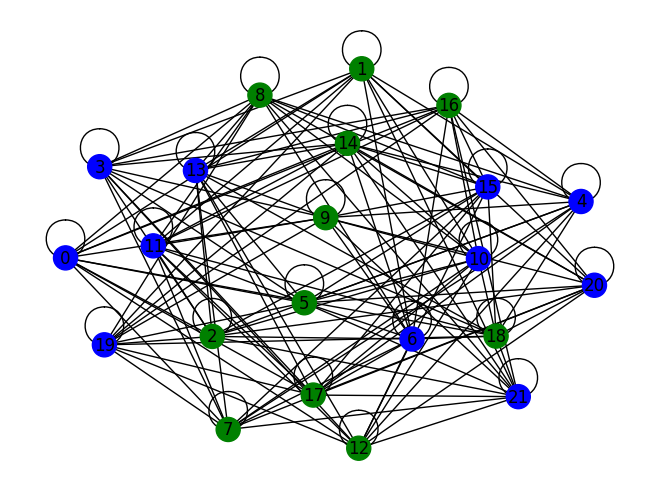

In [41]:
import networkx as nx
A=np.matrix(adj) + np.identity(len(adj))
G = nx.Graph(np.array(A))
A = nx.normalized_laplacian_matrix(G).toarray()
nx.draw(G, node_color=cmap, with_labels=True)